## <center> Car Fare Prediction </center>

<b> Problem Statement:</b> 
You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city. 
 

In [1]:
#before starting this project with dataset. Initially I open test & train_cab files in excel and just look the data available

# starting the project I need to load some libraries to deal with this data

import pandas as pd #for data processing & I/O operations
import numpy as np #for mathematical calculations
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for plotting graphs

import sklearn #for machine learning algorithms

import os #for setting directory, I/O file operations

In [2]:
#setting working diretory
os.chdir("D:\Car Fare Prediction")

In [3]:
#checking the file directory
os.getcwd()

'D:\\Car Fare Prediction'

In [4]:
#load train & test data for analysis
train = pd.read_csv("train_cab.csv")
test = pd.read_csv("test.csv")

## Understanding the data

In [5]:
#after loading both the data, checking both datas number of variables & records also few records 
#number of variables & records in train dataset
train.shape

(16067, 7)

In [6]:
test.shape

(9914, 6)

From above two lines of code, I see there are 16067 records & 7 variables in train dataset 
and 9914 records & 6 variable in test dataset

In [7]:
#checking few data in train dataset
train.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [8]:
#checking few data in test dataset
test.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1


<b> Analyse: </b> After checking both the dataset, I found that there is 6 indepedent variable and 1 dependent variable in train dataset. So I need to analyse the train dataset properly and develope the model and that model will be implemented on test dataset.

In [9]:
#print concise summary of columns in train dataset
train.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [10]:
#print concise summary of columns in test dataset
test.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


Convert the dtypes in required format then complete the missing value analysis

* pickup_datetime variable of train & test seem to be datetime column, which are in object dtypes. Convert them into datetime

* fare_amount variable of train dataset is in object dtypes. convert it into float dtypes

* also, passenger_count of test dataset is in integer dypes, convert it into float dypes

In [13]:
#convert pickup_datetime of train dataset in datetime
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], format = "%Y-%m-%d %H:%M:%S UTC")

In [12]:
#while converting get error: time data '43' does not match format '%Y-%m-%d %H:%M:%S UTC'
#it seems wrong entry of 43 in pickup_datetime variable need to drop this observation
#dropping 43 in pickup_datetime
train = train.drop(train[train['pickup_datetime']=='43'].index, axis =0) #1 observation dropped
#again executing above step

In [14]:
#convert pickup_datetime in test dataset
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], format = "%Y-%m-%d %H:%M:%S UTC")

In [15]:
#convert passenger_count in test dataset
test['passenger_count'] = test['passenger_count'].astype(float)

In [18]:
#before performing any mathermatical operations I need to convert object dtype into float dtype
train['fare_amount'] = train['fare_amount'].astype(float)

<b>Important:</b> While performing conversion from object to float dtypes, i found one error i.e. one value present 430- present in train dataset. So here I need to drop that values. Because it wont make any sense. 
After droping that value again I am performing above conversion 

In [17]:
#drop the 430- value in train dataset
train = train.drop(train[train['fare_amount']=='430-'].index, axis = 0) #1 observation dropped
#again execute above step

In [19]:
#checking dtypes of train & test dataset
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [20]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

Everytthing is set. NOW lets do Missing Value analysis

----------------------------------------------------------------------------------------------------
Seeing the both dataset summary, I conclude that, there are some missing values in train dataset i.e. fare_amount and passenger_count and No missing data in test dataset. 

# Missing value treatment

In [21]:
#check for missing values in train dataset
train.isnull().sum().sort_values(ascending = False)

passenger_count      55
fare_amount          24
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
dtype: int64

In [22]:
#drop the missing values
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [23]:
# check the remaing dataset variable and records
train.shape

(15986, 7)

In [24]:
#checking the target variable i.e. fare_amount
train['fare_amount'].describe()

count    15986.000000
mean        15.030453
std        431.213944
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [25]:
#checking if any negative fare_amount values in train dataset
from collections import Counter
Counter(train['fare_amount'] <=0)

Counter({False: 15982, True: 4})

In [26]:
#now I have to drop fare_amount negative & zero value, which wont make any sense. Remove this fields
train = train.drop(train[train['fare_amount']<0].index, axis = 0) #3 observations dropped
train = train.drop(train[train['fare_amount']== 0].index, axis = 0) #1 observations dropped
train.shape

(15982, 7)

In [27]:
#final checking no more negative values for fare field
train['fare_amount'].describe()

count    15982.000000
mean        15.034740
std        431.267821
min          0.010000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

<b> Note: </b> Describe function shows that there is max value: 54343.00 in fare_amount variable. Which is not possible in Car Fare amount. It will lead wrong conclusion. So either I need to correct that value or need to drop that observations 

In [28]:
#max value shows: fare_amount 54343.00 
#need to check the highest fare_amount
#checking the highest fare in train dataset
train['fare_amount'].sort_values(ascending = False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
9651        66.30
           ...   
15257        2.50
12598        2.50
12705        2.50
8263         2.50
10458        2.50
1774         2.50
13488        2.50
3558         2.50
8547         2.50
3427         2.50
15490        2.50
10111        2.50
503          2.50
8711         2.50
12343        2.50
6765         2.50
5449         2.50
12178        2.50
8680         2.50
15370        2.50
4084         2.50
14530        2.50
12567        2.50
4058         2.50
13571     

After Checking highest fare_amount, fount that there 3 values which are highest and not possible in fare_amount i.e. fare-amount = 54343.0000, fare_amount = 4343.0000 and fare_amount = 0.01. I need to drop these values from the train dataset

In [29]:
#drop wrong fare observation
train = train.drop(train[train['fare_amount']==54343].index, axis =0)
train = train.drop(train[train['fare_amount']==4343].index, axis =0)
train = train.drop(train[train['fare_amount']==0.01].index, axis =0)

In [30]:
train.shape

(15979, 7)

In [31]:
#checking the highest fare_amount
train['fare_amount'].sort_values(ascending = False)

607      453.00
980      434.00
1335     180.00
1483     165.00
6630     128.83
14142    108.00
12349    104.67
12915     96.00
7810      95.00
9431      88.00
10077     87.30
12614     87.00
4620      85.50
14519     82.50
12437     80.75
2639      79.00
4013      77.70
13962     77.15
2013      77.00
6668      76.80
8363      76.00
10524     75.80
11019     75.33
13615     75.00
15023     73.30
1494      70.00
4118      69.70
9651      66.30
649       66.30
1709      65.50
          ...  
10705      2.50
13488      2.50
3168       2.50
12178      2.50
13221      2.50
6632       2.50
6703       2.50
6765       2.50
9773       2.50
15370      2.50
1419       2.50
6007       2.50
503        2.50
4367       2.50
8680       2.50
8603       2.50
4321       2.50
226        2.50
9621       2.50
8596       2.50
8916       2.50
7908       2.50
3558       2.50
10111      2.50
8547       2.50
7918       2.50
15257      2.50
13877      2.50
6002       2.50
1427       1.14
Name: fare_amount, Lengt

In [32]:
#the highest fare_amount is 453.00
#the lowest fare_amount is 1.14

Now, I am dealing with passenger_count variable

In [33]:
train['passenger_count'].describe()

count    15979.000000
mean         2.623795
std         60.905468
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

Checking the passenger_count summary. I shock to see the max value is 5345. Lol which is not possible even in train. Lets check the list of passenger_count in descending order. It will clear the picture

In [34]:
train['passenger_count'].sort_values(ascending = False)

1146     5345.0
293      5334.0
8985      557.0
971       554.0
8506      537.0
1200      536.0
356       535.0
8715      531.2
263       456.0
386       354.0
1107      345.0
233       236.0
8571       87.0
8445       58.0
1007       53.0
8406       53.0
1242       43.0
8631       43.0
1043       35.0
7209        6.0
2060        6.0
6335        6.0
1217        6.0
11146       6.0
10903       6.0
15669       6.0
15291       6.0
3549        6.0
2078        6.0
14282       6.0
          ...  
8661        0.0
6575        0.0
5150        0.0
4354        0.0
4344        0.0
5557        0.0
8916        0.0
6881        0.0
4114        0.0
314         0.0
3489        0.0
11462       0.0
5688        0.0
2200        0.0
6036        0.0
9159        0.0
10642       0.0
14196       0.0
13742       0.0
5914        0.0
15514       0.0
8971        0.0
1160        0.0
5517        0.0
12611       0.0
9965        0.0
3034        0.0
3481        0.0
15919       0.0
11803       0.0
Name: passenger_count, L

After Checking, passenger_count ranges from 35 to 5345. As I am analyzing dataset of Cabs, then This is not possible. So these values are stictly outliers. I need to drop them.

In [35]:
#for car fare prediction, I am consider the Max Number of passengers are 6. Which make sense if car is "SUV"
#Now drop the observations which has passenger_count value greater than 6
train = train.drop(train[train['passenger_count']>6].index, axis=0) #19 observations dropped

In [40]:
#again check the summary of passenger_count variable
train['passenger_count'].describe()

count    15902.000000
mean         1.649686
std          1.265840
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

Also there are some observations with passenger_count = 0 & 0.12, So these values are stictly outliers. I need to drop them.

In [37]:
#droping passenger_count=0 observations
train = train.drop(train[train['passenger_count']==0].index, axis=0) #57 observations dropped

In [38]:
#dropping passenger_count =0.12 observation
train = train.drop(train[train['passenger_count']==0.12].index, axis=0) #only 1 observation dropped

In [39]:
#cheking test dataset passenger_count summary if passenger_count =0 is present???
test['passenger_count'].describe()

count    9914.000000
mean        1.671273
std         1.278747
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

our test dataset is free from passenger_count outliers

Now its time to deal with the pickup latitude and longitudes

In [41]:
#let us explore the pickup latitude and longitudes
train['pickup_latitude'].describe()

count    15902.000000
mean        39.921445
std          6.817455
min        -74.006893
25%         40.734949
50%         40.752640
75%         40.767382
max        401.083332
Name: pickup_latitude, dtype: float64

In [42]:
train['pickup_longitude'].describe()

count    15902.000000
mean       -72.474987
std         10.538452
min        -74.438233
25%        -73.992144
50%        -73.981691
75%        -73.966805
max         40.766125
Name: pickup_longitude, dtype: float64

Exploring the pickup longitute and latidude it is difficult to know the location for that reason I just Google these things. Found one useful website to identify the location
https://www.latlong.net/Show-Latitude-Longitude.html
The above website gives the Actual Location based on longitude and latitude
after doing so randon check on website and using describe function, I conclude that the pilot project run in New York City of United States.

Googleing gives the New York City Longitude and Latitude
i.e. 
* New York City Latitude and longitude coordinates are: 40.730610, -73.935242.

after using describe function on train dataset pickup_longitude and pickup_latitude are near to the actual cordinates of New York city. For that I am considering the longitude and latitude ranges for our train dataset

* Latitude ranges from 39 to 43
* Longitude ranges from -72 to -76

from that I can say there are clearly shows some outliers. Let's drop them


In [43]:
#just checking the condition
train[train['pickup_latitude']>39]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1.0


In [44]:
train[train['pickup_latitude']<43]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1.0


In [45]:
#I need to drop this outliers that are above 39.0000
train = train.drop(train[train['pickup_latitude']<39].index, axis=0) #318 observations dropped because of wrong enrty.

In [48]:
train.shape

(15583, 7)

In [47]:
train = train.drop(train[train['pickup_latitude']>43].index, axis=0) #1 observation dropped

In [49]:
train['pickup_latitude'].describe()

count    15583.000000
mean        40.750923
std          0.038016
min         39.603178
25%         40.736592
50%         40.753368
75%         40.767805
max         41.366138
Name: pickup_latitude, dtype: float64

319 observations droped because there are many 0.0000 pickup_latitidues are present that not showed in United States

In [50]:
train['pickup_longitude'].describe()

count    15583.000000
mean       -73.974797
std          0.041558
min        -74.438233
25%        -73.992373
50%        -73.982049
75%        -73.968079
max        -73.137393
Name: pickup_longitude, dtype: float64

In [51]:
#similar operation for pickup longitude
train = train.drop(train[train['pickup_longitude']>-72].index, axis=0)

In [54]:
train.shape

(15583, 7)

In [53]:
train = train.drop(train[train['pickup_longitude']<-76].index, axis=0)

In [ ]:
#NO observationn drop after this operations

Now dealing with the dropoff_lattitude and dropoff_longitude

In [55]:
#similar operation for dropoff latitude and longitude
train['dropoff_latitude'].describe()

count    15583.000000
mean        40.725305
std          1.030963
min          0.000000
25%         40.736300
50%         40.754217
75%         40.768311
max         41.366138
Name: dropoff_latitude, dtype: float64

In [56]:
train = train.drop(train[train['dropoff_latitude']<39].index, axis=0) #10 observations dropped

In [59]:
train.shape

(15573, 7)

In [58]:
train = train.drop(train[train['dropoff_latitude']>43].index, axis=0) #no observation dropped

In [61]:
#performing same operations on dropoff_longitude and dropoff_latitude
train = train.drop(train[train['dropoff_longitude']>-72].index, axis=0) #3 observations dropped

In [64]:
train.shape 

(15570, 7)

In [63]:
train = train.drop(train[train['dropoff_longitude']<-76].index, axis=0) #no observation dropped

# Feature Selection

<b>Correlation Analysis: </b> Here I am generating correlation matrix to understand how the each variable related with each other. In that I am plotting correlation matrix and generate plot using seabon library for better understanding 

In [65]:
#Correlation analysis, generate correlation matrix
corr = train.corr()

In [66]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.298960,-0.131786,0.252538,-0.105001,0.004734
pickup_longitude,0.298960,1.000000,0.196346,0.390560,0.154156,-0.004675
pickup_latitude,-0.131786,0.196346,1.000000,0.158357,0.505780,-0.003151
dropoff_longitude,0.252538,0.390560,0.158357,1.000000,0.260921,-0.007609
dropoff_latitude,-0.105001,0.154156,0.505780,0.260921,1.000000,-0.003112
passenger_count,0.004734,-0.004675,-0.003151,-0.007609,-0.003112,1.000000


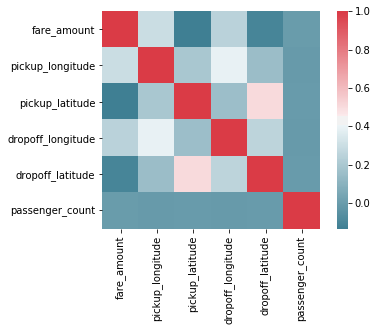

In [67]:
#plot using seborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square =True)

The above correlation analysis shows that, each variable in dataset is independent and not correlated with each other. So, each variable or feature play an important role to predict the fare_amount

Check the data types of each columns in train and test dataset before further analysis

In [68]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [69]:
#convert the dtypes of test dataset
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

Looks, everything is in perfect dtypes. Let's move forward

In [70]:
#check the data
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [71]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1.0
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1.0


Now, for <b>Exploratory Data Analysis </b>  list assumptions I Made
* Does the passenger_count (Number of Passengers) affect the fare_amount (fare)?
* Does the pickup_datetime (Pickup Date & Time) affect the fare_amount (fare)?
* Does the day of the week affect the fare_amount (fare)?
* Does the distance travelled affect the fare_amount (fare)?

First, Let's split the datetime field pickup_datetime to the following:
* year
* month 
* date 
* hour
* day of the week

after this conversion, I will calculate the day of the week and come to our conclusion about how the pickup_location affect the fare_amount.

Lets do this first

In [72]:
data = [train, test]
for i in data:
    i['Year'] = i ['pickup_datetime'].dt.year
    i['Month'] = i ['pickup_datetime'].dt.month
    i['Date'] = i ['pickup_datetime'].dt.day
    i['Day_of_week'] = i ['pickup_datetime'].dt.dayofweek
    i['Hour'] = i ['pickup_datetime'].dt.hour

In [73]:
#check the train & test datset
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day_of_week,Hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7


In [74]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day_of_week,Hour
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1.0,2015,1,27,1,13
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1.0,2015,1,27,1,13
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1.0,2011,10,8,5,11
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1.0,2012,12,1,5,21
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1.0,2012,12,1,5,21


Now the most important, need to calculate the distance travelled by cab from the pickup latutude & longitude and dropoff latutude & longitude. To know how to calulate the distance from give data, I need to find formula.

After Googleing, I found formula, named as <b>Haversine Formula.</b>

Also creating a new filed 'distance' to fetch the distance between pickup and drop location

We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

<b>
haversine(θ) = sin²(θ/2)
</b>


Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

<b>a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)</b>

<b>c = 2 * atan2( √a, √(1−a) )</b>

<b>d = R ⋅ c </b>

<b>d = Haversine distance</b>

In [75]:
def harvesine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data: 
        R = 6371 #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
        
        delta_phi = np.radians(i[lat2] - i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
        
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi/2.0)**2 + np.cos(phi1) * np.cos(phi2)* np.sin(delta_lambda/2.0)**2
        
        #c = 2 * arctan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        
        #d = R * c
        d = (R * c) #distance in kilometers
        i['H_Distance'] = d
    return d

In [76]:
harvesine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [77]:
train['H_Distance'].head(10)

0     1.030764
1     8.450134
2     1.389525
3     2.799270
4     1.999157
5     3.787239
6     1.555807
7     4.155444
9     2.849627
10    1.374577
Name: H_Distance, dtype: float64

In [78]:
test['H_Distance'].head(10)

0     2.323259
1     2.425353
2     0.618628
3     1.961033
4     5.387301
5     3.222549
6     0.929601
7    21.540102
8     3.873962
9     1.099794
Name: H_Distance, dtype: float64

In [79]:
train.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day_of_week,Hour,H_Distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157
5,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1.0,2011,1,6,3,9,3.787239
6,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1.0,2012,11,20,1,20,1.555807
7,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1.0,2012,1,4,2,17,4.155444
9,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2.0,2009,9,2,2,1,2.849627
10,5.3,2012-04-08 07:30:50,-73.996335,40.737142,-73.980721,40.733559,1.0,2012,4,8,6,7,1.374577


In [80]:
test.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day_of_week,Hour,H_Distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1.0,2015,1,27,1,13,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1.0,2015,1,27,1,13,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1.0,2011,10,8,5,11,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1.0,2012,12,1,5,21,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1.0,2012,12,1,5,21,5.387301
5,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1.0,2012,12,1,5,21,3.222549
6,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1.0,2011,10,6,3,12,0.929601
7,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1.0,2011,10,6,3,12,21.540102
8,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1.0,2011,10,6,3,12,3.873962
9,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1.0,2014,2,18,1,15,1.099794


Here I also varify the actual distance I get through this formula and distance provided by website: https://www.geodatasource.com/distance-calculator based on longitude and latitude. 

From this I conclude that I am on right track

Now lets clarify assumptions one by one that I made earlier:

* <b>Does the passenger_count (Number of Passengers) affect the fare_amount (fare)?</b>

Text(0, 0.5, 'Frequency')

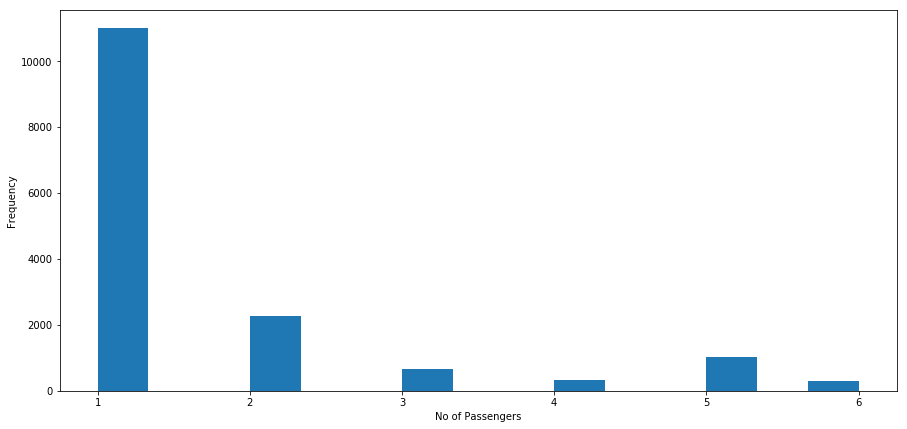

In [81]:
plt.figure(figsize = (15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

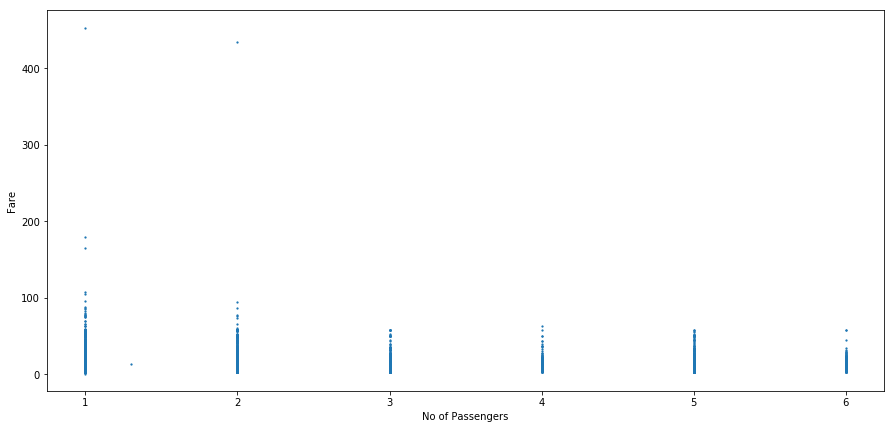

In [82]:
plt.figure(figsize = (15,7))
plt.scatter(x = train['passenger_count'], y = train['fare_amount'], s=1.5)
plt.xlabel('No of Passengers')
plt.ylabel('Fare')

from above two graphs, I see that single passenger is most frequent travellers, and highest fare also seems to come from cabs which carry just the 1 passenger. 

* <b>Does the pickup_datetime (Pickup Date & Time) affect the fare_amount (fare)?</b>

Text(0, 0.5, 'Fare')

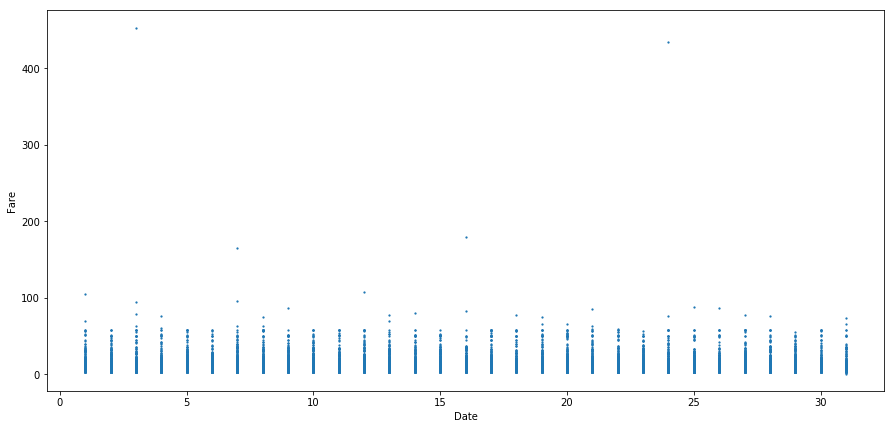

In [83]:
#does the pickupdate of month affect the fare_amount
plt.figure(figsize = (15,7))
plt.scatter(x = train['Date'], y = train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

From the above graph, the fare_amount throughout the month is seem to be uniform, with maximum fare received on th 3rd 

Text(0, 0.5, 'Frequency')

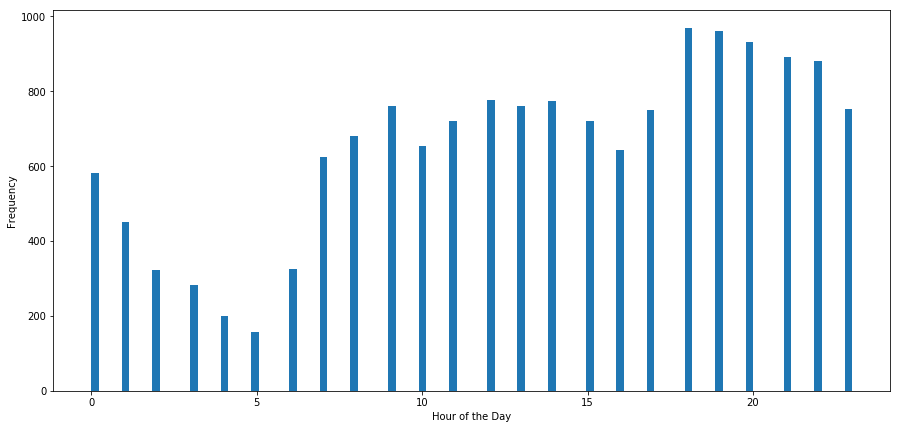

In [84]:
#does pickuptime of the day affect the fare_amount?
plt.figure(figsize = (15,7))
plt.hist(train['Hour'], bins = 100)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

As the above graph shows, The time of the day plays an important role. The frequency of cab rides seem to be lowest at 5AM and the highest at 6PM.

Text(0, 0.5, 'Fare')

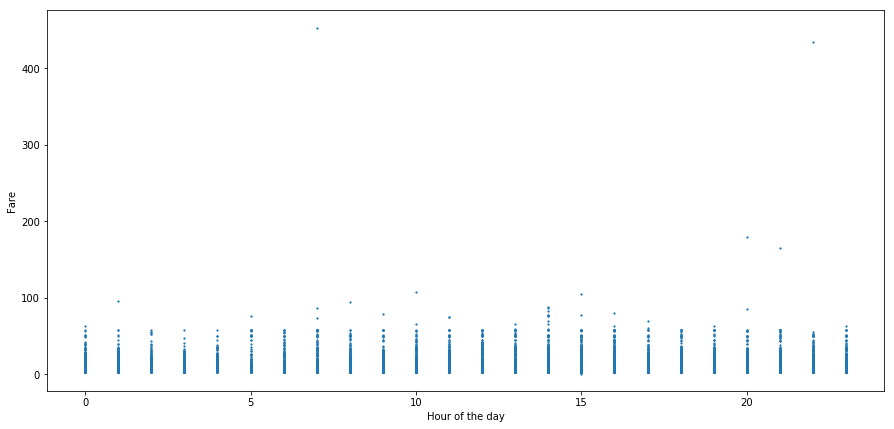

In [85]:
plt.figure(figsize = (15,7))
plt.scatter(x = train['Hour'], y = train['fare_amount'], s =1.5)
plt.xlabel('Hour of the day')
plt.ylabel('Fare')

The fares, seem to be the high between 5AM to 10AM and 1PM to 4PM. Maybe people who leave early to avoid traffic and cover large distance.

* <b> Does the day of the week affect the fare_amount (fare)? </b>

Text(0, 0.5, 'Frequency')

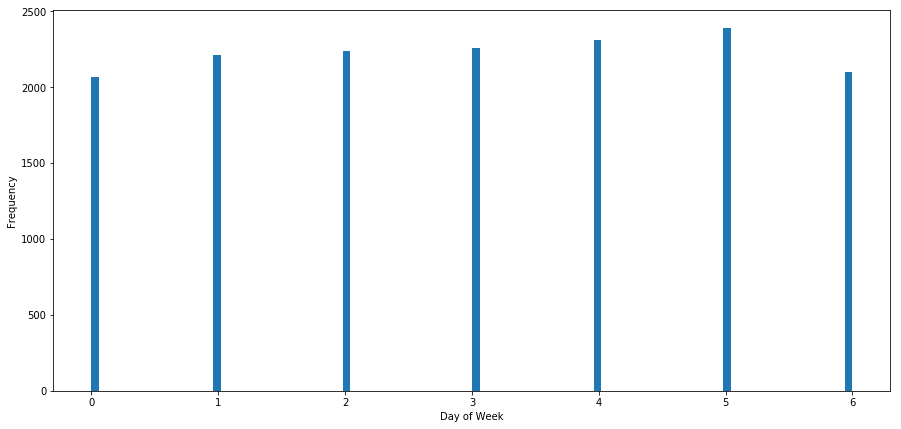

In [86]:
#plot graph for day of week  The day of the week with Monday=0, Sunday=6.
plt.figure(figsize = (15,7))
plt.hist(train['Day_of_week'], bins =100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

The day of the week doesn't seem to have that much effect on number of cab rides

Text(0, 0.5, 'Fare')

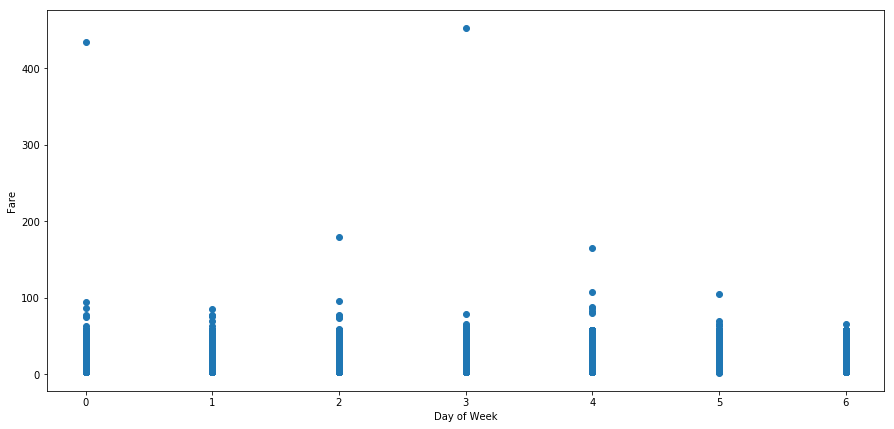

In [87]:
plt.figure(figsize = (15,7))
plt.scatter(x = train['Day_of_week'], y = train['fare_amount'])
plt.xlabel('Day of Week')
plt.ylabel('Fare')

above graph visualization not much affected by the day of week, The highest fares seem to be on Monday and Friday and the lowest on Thrusday and Sunday. Maybe people travel far distances on Monday to reach offices and Friday to reach back home, hence there is high fares. Many people preffer to stay at home on Sunday or has low fare due to holiday of offices shut. 

* <b> Does the distance travelled affect the fare_amount (fare)? </b>

This is the obvious answer and we are confident about it that the distance travelled absolutely affect the fare_amount. But I will check with visualization

In [88]:
train.sort_values(['H_Distance', 'fare_amount'],ascending = False)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day_of_week,Hour,H_Distance
10710,3.70,2011-02-11 21:46:09,-73.955411,39.604164,-73.955647,40.772837,1.0,2011,2,11,4,21,129.950482
14536,4.10,2011-04-03 12:16:46,-73.982155,40.775187,-73.976399,39.610030,1.0,2011,4,3,6,12,129.560455
11619,11.30,2011-05-27 21:47:44,-73.945106,39.603178,-73.976636,40.749643,1.0,2011,5,27,4,21,127.509261
12228,16.50,2011-04-26 23:18:56,-73.993360,40.721749,-73.977370,39.610604,2.0,2011,4,26,1,23,123.561157
5663,49.15,2009-02-25 07:05:05,-73.137393,41.366138,-74.000940,40.731723,1.0,2009,2,25,2,7,101.094619
1684,2.50,2009-05-02 19:01:01,-73.137393,41.366138,-73.996510,40.745320,2.0,2009,5,2,5,19,99.771579
3075,6.90,2009-01-06 10:53:36,-73.137393,41.366138,-73.974598,40.751311,1.0,2009,1,6,1,10,97.985088
9899,7.70,2009-08-12 19:04:53,-73.974361,40.755168,-73.137393,41.366138,1.0,2009,8,12,2,19,97.670590
4487,4.90,2009-08-26 07:43:16,-73.137393,41.366138,-73.957685,40.765644,1.0,2009,8,26,2,7,95.852036
9808,6.90,2009-08-13 23:15:28,-73.137393,41.366138,-73.952331,40.786380,1.0,2009,8,13,3,23,93.925599


In [89]:
len(train)

15570

After sorting data in ascending order, I found the maximum distance travelled will be 130KM. check for any outliers

Text(0, 0.5, 'Frequency')

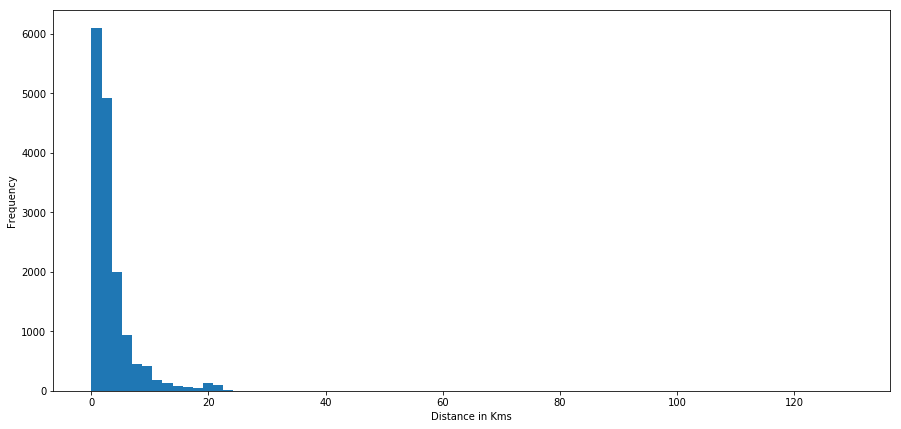

In [90]:
plt.figure(figsize = (15,7))
plt.hist(train['H_Distance'], bins=75)
plt.xlabel('Distance in Kms')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

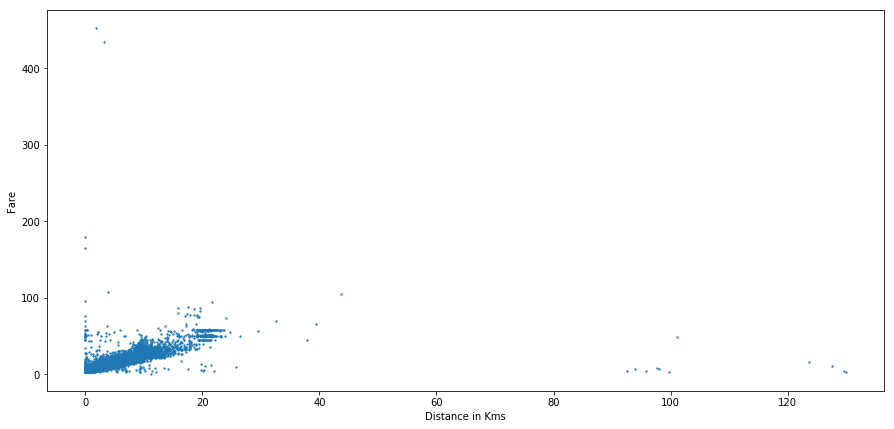

In [91]:
plt.figure(figsize = (15,7))
plt.scatter(x = train['H_Distance'], y = train['fare_amount'], s=1.5 )
plt.xlabel('Distance in Kms')
plt.ylabel('Fare')

There are values which are greater than 100Kms! As this data is from New York City, I am not sure why people would take a car to travel more than 100Kms. Since there is not much data present beyond 50Kms. So this is the outliers. 

In next step I am droping these outliers: 

In [92]:
train['H_Distance'].sort_values(ascending =False)

10710    129.950482
14536    129.560455
11619    127.509261
12228    123.561157
5663     101.094619
1684      99.771579
3075      97.985088
9899      97.670590
4487      95.852036
9808      93.925599
7401      92.605848
12349     43.648755
649       39.476975
6308      37.812945
4118      32.602535
7021      29.478280
6677      26.369072
4567      25.735917
8105      24.690884
15023     24.125745
15178     23.814940
14099     23.696200
12433     23.513721
4268      23.196680
3216      23.184092
4299      23.168706
12941     23.114168
13804     23.077267
538       23.066627
13598     23.037380
            ...    
7777       0.000000
270        0.000000
4793       0.000000
7692       0.000000
12973      0.000000
15230      0.000000
1419       0.000000
12915      0.000000
12847      0.000000
3945       0.000000
12646      0.000000
12581      0.000000
12541      0.000000
12420      0.000000
1630       0.000000
5452       0.000000
7408       0.000000
12412      0.000000
7425       0.000000


In [93]:
#only 11 values are outliers, so I can remove them
train = train.drop(train[train['H_Distance']>50].index, axis =0) #11 observations dropped

In [94]:
train.shape 

(15559, 13)

Now here, I found that some distances are showing 0 value. Now I am checking the rows where the distance values are 0

In [95]:
train[train['H_Distance']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day_of_week,Hour,H_Distance
105,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,2009,3,25,2,0,0.0
191,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,2014,1,8,2,21,0.0
270,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,2012,8,25,5,1,0.0
290,6.90,2009-12-14 12:33:00,-73.982432,40.745747,-73.982432,40.745747,1.0,2009,12,14,0,12,0.0
396,12.00,2014-03-12 18:12:44,-73.844904,40.736318,-73.844904,40.736318,1.0,2014,3,12,2,18,0.0
503,2.50,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,2010,1,19,1,1,0.0
657,2.50,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,2009,8,25,1,1,0.0
737,57.33,2014-08-11 19:37:00,-73.776477,40.646290,-73.776477,40.646290,2.0,2014,8,11,0,19,0.0
808,6.10,2010-10-22 02:24:53,-73.984433,40.771084,-73.984433,40.771084,1.0,2010,10,22,4,2,0.0
843,5.50,2014-07-19 04:42:00,-73.990532,40.719085,-73.990532,40.719085,1.0,2014,7,19,5,4,0.0


After evaluating I found that there are 155 observations with distance = 0.

This could be the reason because:
* The cab waited the whole time and passenger cancelled the trip after sometime. Thats the reason why the pickup and dropoff coordinates are same and maybe, passenger was charged for the waiting time. 
* otherwise, there may be the chances of wrong coordinates are entered.

comparing the count of 155 observations with train dataset 15617. I can drop this data, by condering the wrong coordnates are entered.

In [96]:
#drop the distance =0 observations
train = train.drop(train[train['H_Distance']==0].index, axis=0)

In [97]:
train.shape

(15404, 13)

let's check if any rows with distance values with 0 in test dataset


In [98]:
test[test['H_Distance']==0]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day_of_week,Hour,H_Distance
121,2014-06-14 13:39:00,-73.980590,40.747682,-73.980590,40.747682,1.0,2014,6,14,5,13,0.0
279,2010-09-05 22:31:32,-74.047394,40.785789,-74.047394,40.785789,1.0,2010,9,5,6,22,0.0
318,2009-06-10 16:55:00,-73.985862,40.744027,-73.985862,40.744027,1.0,2009,6,10,2,16,0.0
417,2011-06-24 12:03:00,-73.964615,40.777620,-73.964615,40.777620,1.0,2011,6,24,4,12,0.0
423,2011-06-24 12:03:00,-73.955065,40.771505,-73.955065,40.771505,1.0,2011,6,24,4,12,0.0
434,2011-06-24 12:03:00,-73.960738,40.775717,-73.960738,40.775717,1.0,2011,6,24,4,12,0.0
451,2011-06-24 12:03:00,-73.967895,40.765477,-73.967895,40.765477,1.0,2011,6,24,4,12,0.0
491,2011-06-24 12:03:00,-73.830820,40.759288,-73.830820,40.759288,1.0,2011,6,24,4,12,0.0
498,2011-06-24 12:03:00,-73.945490,40.752820,-73.945490,40.752820,1.0,2011,6,24,4,12,0.0
666,2012-11-11 20:35:40,-73.970087,40.755266,-73.970087,40.755266,1.0,2012,11,11,6,20,0.0


In [99]:
#droping the observations distance =0 in test dataset
test = test.drop(test[test['H_Distance']==0].index, axis=0)

In [100]:
test.shape #dropped 85 observations

(9829, 12)

# Modelling & Predictions

Finally, Finally, Data Cleaning is done! Now lets bulid the model and predict the results

In machine Learning there is Two main types:
* <b>Supervised Machine Learning :</b> knowledge of output. Target Variable is fix 
* <b>Unsupervised Machine Learning:</b> No knowledge of Output. Self Guided Learnig Algorithms.

Selecting model is main Part of Modelling, We have various model algorithms some of the basic algorithms are:
* <b>Linear Regression :</b> Best suitable for Regression Model
* <b>Logistic Regression:</b> Suitable for Classification Model

* <b>Decision Tree:</b> Best suitable for Regression & Classification model
* <b>Random Forest:</b> Mostly used for Classification model analysis but can be use for Regression model

* <b>KNN algorithms: </b> Can be used for Regression and Classification model
* <b> Naive Bayes: </b> used for Classification Model

Currently I am dealing with <b> Regression Model</b> So I am considering following algorithm models:

* Linear Regression
* Decision Tree
* Random Forest
* KNN Algorithms

In [101]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Day_of_week', 'Hour', 'H_Distance'],
      dtype='object')

In [102]:
test.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Day_of_week', 'Hour', 'H_Distance'],
      dtype='object')

In [103]:
#drop the pickup_datetime columns as datatime cannot be directly used for modeling
#so this can done on both train and test dataset
train = train.drop(columns='pickup_datetime')

In [104]:
test = test.drop(columns='pickup_datetime')

In [105]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Day_of_week', 'Hour', 'H_Distance'],
      dtype='object')

In [106]:
test.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'Year', 'Month', 'Date',
       'Day_of_week', 'Hour', 'H_Distance'],
      dtype='object')

Before moving forward lets split train data into to part (train_data) training data and (test_data) testing data in 80/20 manner

In [107]:
#define feature matrix and response vector
X = train.drop('fare_amount', axis=1)

In [108]:
y = train.iloc[:,0].values

In [ ]:
train.head(10)

Model Evaluation

# Linear Regression Model

In [187]:
# splitting X and y into training and testing dataset
#import sklearn train_test_split library 
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y =train_test_split(X,y,test_size=0.2)

In [188]:
#train the model using traing dataset
#import LinearRegression libraries from sklearn
from sklearn import linear_model
import statsmodels.api as sm

In [189]:
#create linear regression object
LR_model = linear_model.LinearRegression()

In [190]:
LR_model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [191]:
LR_predict = LR_model.predict(test_X)

In [192]:
#train the model using training dataset
model_LR = sm.OLS(train_y, train_X).fit()

In [193]:
#make the predictions by model
predict_LR = model_LR.predict(test_X)

In [171]:
#printout summary
model_LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     6257.
Date:                Mon, 12 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:24:58   Log-Likelihood:                -39437.
No. Observations:               12323   AIC:                         7.890e+04
Df Residuals:                   12312   BIC:                         7.898e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude     12.3931      1.419      8.736      0.000       9.612      15.174
pickup_latitude       9.6711      1.969      4.911      0.000       5.811      13.531
dropoff_longitude     0.1102      1.382      0.080      0.936      -2.599       2.819
dropoff_latitude    -10.8352      1.791     -6.049      0.000     -14.346      -7.324
passenger_count       0.0105      0.042      0.250      0.803      -0.072       0.093
Year                  0.4851      0.028     17.537      0.000       0.431       0.539
Month                 0.0721      0.016      4.626      0.000       0.042       0.103
Date                 -0.0068      0.006     -1.107      0.268      -0.019       0.005
Day_of_week          -0.0272      0.027     -0.998      0.319      -0.081       0.026
Hour                  0.0046      0.008      0.552      0.581      -0.012       0.021
H_Distance            2.2069      0.015    145.387      0.000       2.177       2.237
==============================================================================
Omnibus:                    34886.856   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3555322451.300
Skew:                          36.997   Prob(JB):                         0.00
Kurtosis:                    2633.360   Cond. No.                     9.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A few things, I learn from this output

* pickup_longitude, pickup_latitude, dropoff_latitude, year, month, hour, H_distance have small p-values, where as dropoff_longitude, passenger_count, date have a larger p-values


* Here I reject the null-hypothesis for pickup_longitude, pickup_latitude, dropoff_latitude, year, month, hour, H_distance
    
    
    * There is assicoation between these variables and fare_amount
        
        
* Fail to reject the null hypothesis for dropoff_longitude, passenger_count, date

    * There is no association
    

<b> R-squared (0.848)</b> means this model provides better fit for the given data 

but Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

<b>Solution:</b>

 * <b>Adjusted R-squared</b>
 
 Penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.
 
* <b>Better Solution:</b>

Do model Evaluation based on the Error Metrics for Regression: 

For classification problems, we have only used classification accuracy as our evaluation metric. But here we used Error Metrics to evaluate the model

<b>Mean Absolute Error (MAE):</b> is the mean of the absolute value of the errors: In [0,∞), the smaller the better


<b>Mean Squared Error (MSE):</b> is the mean of the squared errors: In [0,∞), the smaller the better

<b>Mean Absolute Percent Error (MAPE):</b> is the mean of the absolute percent value of the errors: In [0,1), the smaller the better


<b>Root Mean Squared Error (RMSE) :</b>is the square root of the mean of the squared errors: In [0,∞), the smaller the better

Let's calculate these by hand, to get an intuitive sense for the results:



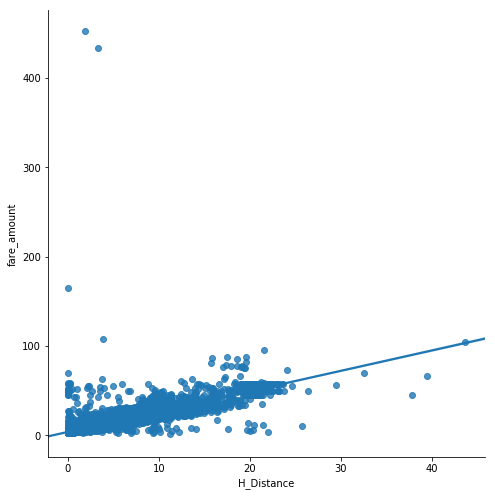

In [194]:
#plotting scatter pair plot H_Distance vs fare_amount
sns.pairplot(train, x_vars=['H_Distance'], y_vars='fare_amount', height = 7,kind='reg')

In [195]:
def MAPE(true_y, pred_y):
    mape = np.mean(np.abs(true_y-pred_y)/true_y)
    return mape

In [196]:
#importing important error metrics libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
# calculate MAE, MSE, MAPE, RMSE
print("MAE:",mean_absolute_error(test_y, predict_LR))
print("MSE:",mean_squared_error(test_y, predict_LR))
print("MAPE:",MAPE(test_y,predict_LR))
print("RMSE:",np.sqrt(mean_squared_error(test_y, predict_LR)))

MAE: 2.309174314217753
MSE: 26.008942624250416
MAPE: 0.21449896785866907
RMSE: 5.099896334657246


* MAE gives less weight to outliers means it is not sensitive to outliers.
* MAPE is similar to MAE, but normalized the true obeservations. When true observation is zero then this metric will be problematic
* MSE is a combination measurement of bias and variance of predictions. It is more popular.
* RSME is square Root of MSE, Root square is taken to make the units of the error be the same as the units of the target. This measure gives more weight to large deviations such as outliers, since large differences squared become larger and small (smaller than 1) differences squared become smaller.

<b>Selection:</b> Outoff these 4 error metrics, MSE and RMSE are mainly used for Time-Series dataset. As I know, current working data is not a time dependend or time-series data. 

for that Reason the Model Evaluation is based on <b>MAPE Error Metrics</b>  


# Decision Tree Model

In [197]:
#decision tree regression
#import DecisionTreeRegressor Analysis

from sklearn.tree import DecisionTreeRegressor

In [198]:
model_DT = DecisionTreeRegressor(max_depth = 2).fit(train_X,train_y)

In [199]:
#apply the model on test data
predict_DT = model_DT.predict(test_X)

In [200]:
# calculate MAE, MSE, MAPE, RMSE
print("MAE:",mean_absolute_error(test_y, predict_DT))
print("MSE:",mean_squared_error(test_y, predict_DT))
print("MAPE:",MAPE(test_y,predict_DT))
print("RMSE:",np.sqrt(mean_squared_error(test_y, predict_DT)))

MAE: 2.9550429514573167
MSE: 30.4739633637039
MAPE: 0.3068516321964189
RMSE: 5.520322759015445


# Random Forest Model

In [201]:
#Random forest analysis
#imnport RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

In [205]:
##create Random Forest object
model_RF = RandomForestRegressor(n_estimators = 1000)

##train the model using training dataset
model_RF.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [206]:
#make the predictions by model
predict_RF = model_RF.predict(test_X)

In [207]:
# calculate MAE, MSE, MAPE, RMSE
print("MAE:",mean_absolute_error(test_y, predict_RF))
print("MSE:",mean_squared_error(test_y, predict_RF))
print("MAPE:",MAPE(test_y,predict_RF))
print("RMSE:",np.sqrt(mean_squared_error(test_y, predict_RF)))

MAE: 2.1157140798442025
MSE: 35.247137087961804
MAPE: 0.21443544640231504
RMSE: 5.936929937936088


# KNN Algorithms

In [208]:
#KNN implementation
from sklearn.neighbors import KNeighborsRegressor


In [209]:
model_KNN = KNeighborsRegressor(n_neighbors =5).fit(train_X, train_y)

In [210]:
predict_KNN = model_KNN.predict(test_X)

In [211]:
# calculate MAE, MSE, MAPE, RMSE
print("MAE:",mean_absolute_error(test_y, predict_KNN))
print("MSE:",mean_squared_error(test_y, predict_KNN))
print("MAPE:",MAPE(test_y,predict_KNN))
print("RMSE:",np.sqrt(mean_squared_error(test_y, predict_KNN)))

MAE: 2.7093073677377477
MSE: 31.841585311262577
MAPE: 0.2727668612728445
RMSE: 5.642834864787607


# Selecting Best suitable model for final analysis

I am consering the MAPE for model evaluatiomn becasue, it calculate average absolute percent error for each time period minus actual values divided by actual values. 

Reason I already explain, lets explain again:

<b>Selection:</b> Outoff these 4 error metrics, MSE and RMSE are mainly used for Time-Series dataset. As I know, current working data is not a time dependend or time-series data.

<b>Random Forest </b> Model has smallest error metrics i.e.
* <b>MAPE = 0.214435</b>

So, for further analysis I am selecting <b>Random Forest Model.</b>

# Implementing Selected Model on actual Test Dataset

In [212]:
#checking test dataset
test.shape

(9829, 11)

In [213]:
#write the cleaned test file in system
test.to_csv('test1.csv', header =True, index =False)

In [214]:
#implementing RamdomForest model on test dataset
pred_test = model_RF.predict(test)

In [215]:
#print the result
pred_test

array([10.1196 , 10.629  ,  4.2461 , ..., 53.39685, 22.27062,  7.4528 ])

In [216]:
#checking the pred_test
pred_test.shape

(9829,)

# Submission

In [217]:
#final result submission
submission = pd.read_csv("test1.csv")
submission['fare_amount'] = pred_test
submission.to_csv('submission_RF.csv', index=False)
submission.head(20)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day_of_week,Hour,H_Distance,fare_amount
0,-73.973320,40.763805,-73.981430,40.743835,1.0,2015,1,27,1,13,2.323259,10.11960
1,-73.986862,40.719383,-73.998886,40.739201,1.0,2015,1,27,1,13,2.425353,10.62900
2,-73.982524,40.751260,-73.979654,40.746139,1.0,2011,10,8,5,11,0.618628,4.24610
3,-73.981160,40.767807,-73.990448,40.751635,1.0,2012,12,1,5,21,1.961033,8.89680
4,-73.966046,40.789775,-73.988565,40.744427,1.0,2012,12,1,5,21,5.387301,16.67834
5,-73.960983,40.765547,-73.979177,40.740053,1.0,2012,12,1,5,21,3.222549,10.20260
6,-73.949013,40.773204,-73.959622,40.770893,1.0,2011,10,6,3,12,0.929601,5.18290
7,-73.777282,40.646636,-73.985083,40.759368,1.0,2011,10,6,3,12,21.540102,47.17687
8,-74.014099,40.709638,-73.995106,40.741365,1.0,2011,10,6,3,12,3.873962,11.36997
9,-73.969582,40.765519,-73.980686,40.770725,1.0,2014,2,18,1,15,1.099794,6.57900
